In [1]:
import numpy as np

from cobaya.run import run
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

import pickle

%matplotlib inline

In [2]:
jobName = 'DALI_ng'
f = open('/scratch/users/ctrendafilova/results/' + jobName + '.pkl', 'rb')
data = pickle.load(f)
f.close()

In [3]:
def getGaussianErrors(fisher):
    gaussianErrors = np.sqrt(np.diag(np.linalg.inv(fisher)))
    return gaussianErrors

In [4]:
myFisher = data['fisherGaussian'][0]['unlensed']
myDALI3 = data['DALI3Gaussian'][0]['unlensed']
myDALI4 = data['DALI4Gaussian'][0]['unlensed']

myGaussianErrors = getGaussianErrors(fisher=myFisher)

In [5]:
def getLogLikelihoodEstimateToCobaya(p1,p2,p3,p4,p5,p6,p7,p8, \
                                     gaussianErrors=myGaussianErrors, \
                                     fisher=myFisher, \
                                     DALI3 = None, DALI4 = None):
    # Estimates likelihood using DALI (https://arxiv.org/abs/1401.6892 Eq. (15))
    # Deviation vector is in format (cosmoParam - cosmoFid)/(gaussian error)
    deviationVector = np.array((p1,p2,p3,p4,p5,p6,p7,p8))
    
    deltaP = deviationVector*gaussianErrors
    logLike = -0.5*np.einsum('ij,i,j', fisher, deltaP, deltaP)
    if DALI3 is not None:
        logLike += -0.5*np.einsum('ijk,i,j,k', DALI3, deltaP, deltaP, deltaP)
    if DALI4 is not None:
        logLike += -0.125*np.einsum('ijkl,i,j,k,l', DALI4, deltaP, deltaP, deltaP, deltaP)
    return logLike

def getLogLikelihoodEstimateToCobaya3(p1,p2,p3,p4,p5,p6,p7,p8, \
                                      gaussianErrors=myGaussianErrors, \
                                      fisher=myFisher, \
                                      DALI3 = myDALI3, DALI4 = None):
    # Estimates likelihood using DALI (https://arxiv.org/abs/1401.6892 Eq. (15))
    # Deviation vector is in format (cosmoParam - cosmoFid)/(gaussian error)
    deviationVector = np.array((p1,p2,p3,p4,p5,p6,p7,p8))
    
    deltaP = deviationVector*gaussianErrors
    logLike = -0.5*np.einsum('ij,i,j', fisher, deltaP, deltaP)
    if DALI3 is not None:
        logLike += -0.5*np.einsum('ijk,i,j,k', DALI3, deltaP, deltaP, deltaP)
    if DALI4 is not None:
        logLike += -0.125*np.einsum('ijkl,i,j,k,l', DALI4, deltaP, deltaP, deltaP, deltaP)
    return logLike

def getLogLikelihoodEstimateToCobaya4(p1,p2,p3,p4,p5,p6,p7,p8, \
                                      gaussianErrors=myGaussianErrors, \
                                      fisher=myFisher, \
                                      DALI3 = myDALI3, DALI4 = myDALI4):
    # Estimates likelihood using DALI (https://arxiv.org/abs/1401.6892 Eq. (15))
    # Deviation vector is in format (cosmoParam - cosmoFid)/(gaussian error)
    deviationVector = np.array((p1,p2,p3,p4,p5,p6,p7,p8))
    
    deltaP = deviationVector*gaussianErrors
    logLike = -0.5*np.einsum('ij,i,j', fisher, deltaP, deltaP)
    if DALI3 is not None:
        logLike += -0.5*np.einsum('ijk,i,j,k', DALI3, deltaP, deltaP, deltaP)
    if DALI4 is not None:
        logLike += -0.125*np.einsum('ijkl,i,j,k,l', DALI4, deltaP, deltaP, deltaP, deltaP)
    return logLike

#flat priors of width=3
widthToCobaya = 3

In [6]:
fisherNorm = {
    "likelihood": {"gen": getLogLikelihoodEstimateToCobaya}
    }

fisherNorm["params"] = {
    "p1": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p2": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p3": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p4": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p5": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p6": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p7": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p8": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}}
    }

fisherNorm["sampler"] = {
    "mcmc": {"Rminus1_stop": 0.002, "max_tries": 1000}
    }

In [7]:
updated_fisherNorm, sampler_fisherNorm = run(fisherNorm)

[gen] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gen: 24700.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: p1:0.9776367, p2:-1.703333, p3:2.154489, p4:-2.912706, p5:1.804089, p6:-2.695996, p7:-0.356821, p8:2.971791
[mcmc] Sampling!
[mcmc] Progress @ 2021-09-15 12:20:06 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 320 samples accepted.
[mcmc]  - Acceptance rate: 0.018
[mcmc]  - Convergence of means: R-1 = 16.183888 after 256 accepted steps
[mcmc]  - Updated

In [8]:
DALI3Norm = {
    "likelihood": {"gen": getLogLikelihoodEstimateToCobaya3}
    }

DALI3Norm["params"] = {
    "p1": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p2": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p3": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p4": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p5": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p6": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p7": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p8": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}}
    }

DALI3Norm["sampler"] = {
    "mcmc": {"Rminus1_stop": 0.002, "max_tries": 2000}
    }

In [9]:
updated_DALI3Norm, sampler_DALI3Norm = run(DALI3Norm)

[gen] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gen: 17200.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: p1:0.6373302, p2:-0.2559649, p3:1.650071, p4:2.324682, p5:-2.873733, p6:-0.8099292, p7:-0.7378042, p8:-0.841666
[mcmc] Sampling!
[mcmc] Progress @ 2021-09-15 12:22:56 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 320 samples accepted.
[mcmc]  - Acceptance rate: 0.008
[mcmc]  - Convergence of means: R-1 = 21.365629 after 256 accepted steps
[mcmc]  - Upd

In [10]:
DALI4Norm = {
    "likelihood": {"gen": getLogLikelihoodEstimateToCobaya4}
    }

DALI4Norm["params"] = {
    "p1": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p2": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p3": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p4": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p5": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p6": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p7": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}},
    "p8": {"prior": {"min": -widthToCobaya, "max": widthToCobaya}}
    }

DALI4Norm["sampler"] = {
    "mcmc": {"Rminus1_stop": 0.002, "max_tries": 1000}
    }

In [11]:
updated_DALI4Norm, sampler_DALI4Norm = run(DALI4Norm)

[gen] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gen: 7840.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: p1:0.6906131, p2:0.5904058, p3:2.951882, p4:-1.218922, p5:-2.021959, p6:0.8483766, p7:-1.164935, p8:-0.2150919
[mcmc] Sampling!
[mcmc] Progress @ 2021-09-15 12:25:39 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 320 samples accepted.
[mcmc]  - Acceptance rate: 0.020
[mcmc]  - Convergence of means: R-1 = 15.884712 after 256 accepted steps
[mcmc]  - Updat

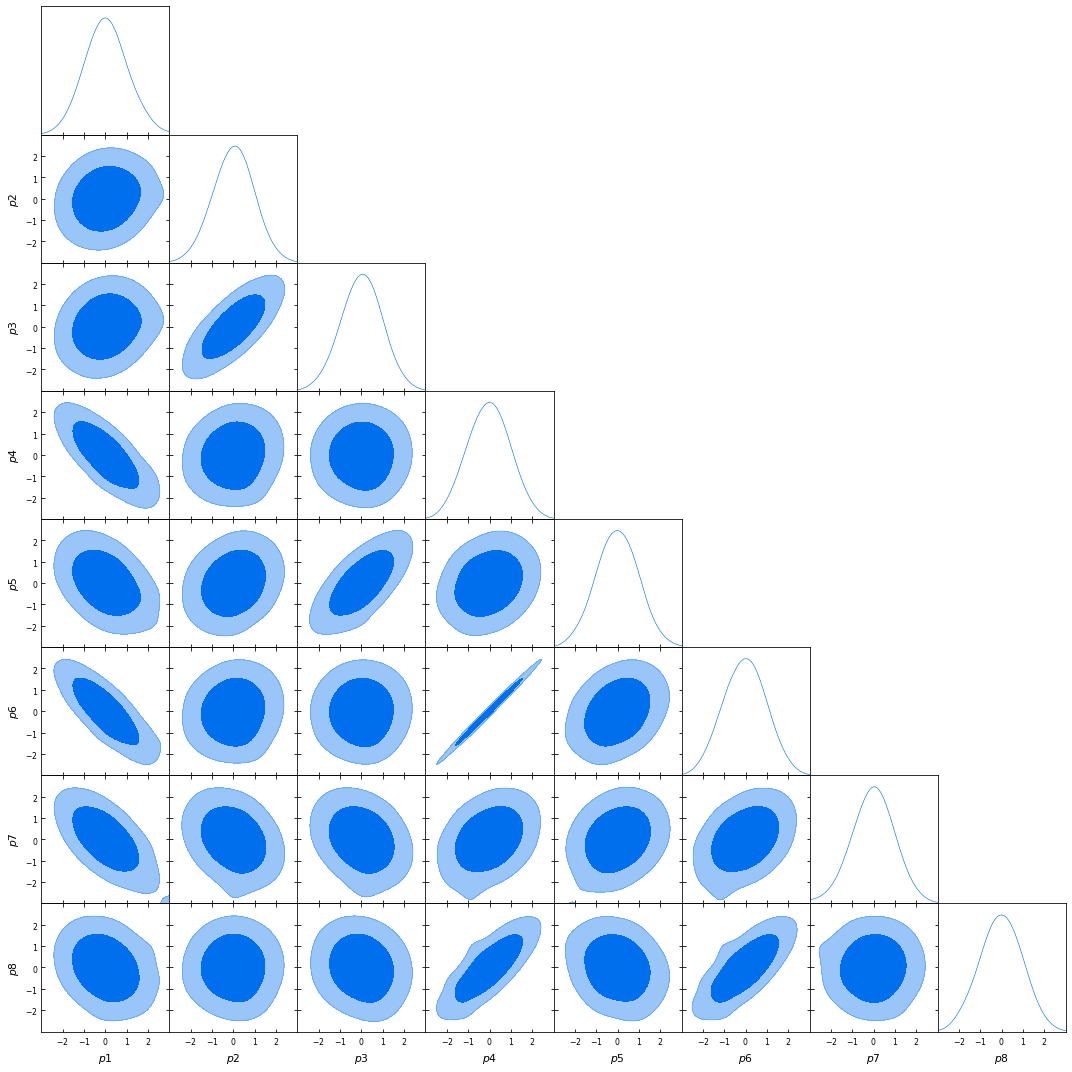

In [12]:
gdsamples_Fisher = MCSamplesFromCobaya(updated_fisherNorm, sampler_fisherNorm.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=15)
gdplot.triangle_plot(gdsamples_Fisher, ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"], filled=True)

[root] *WARNING* auto bandwidth for p8 very small or failed (h=0.0002792382545176852,N_eff=14058.483967281309). Using fallback (h=0.0004457504480718672)
[root] *WARNING* fine_bins not large enough to well sample smoothing scale - p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p2, p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p3, p4
[root] *WARNING* fine_bins_2D not large enough for optimal density: p3, p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p4, p8


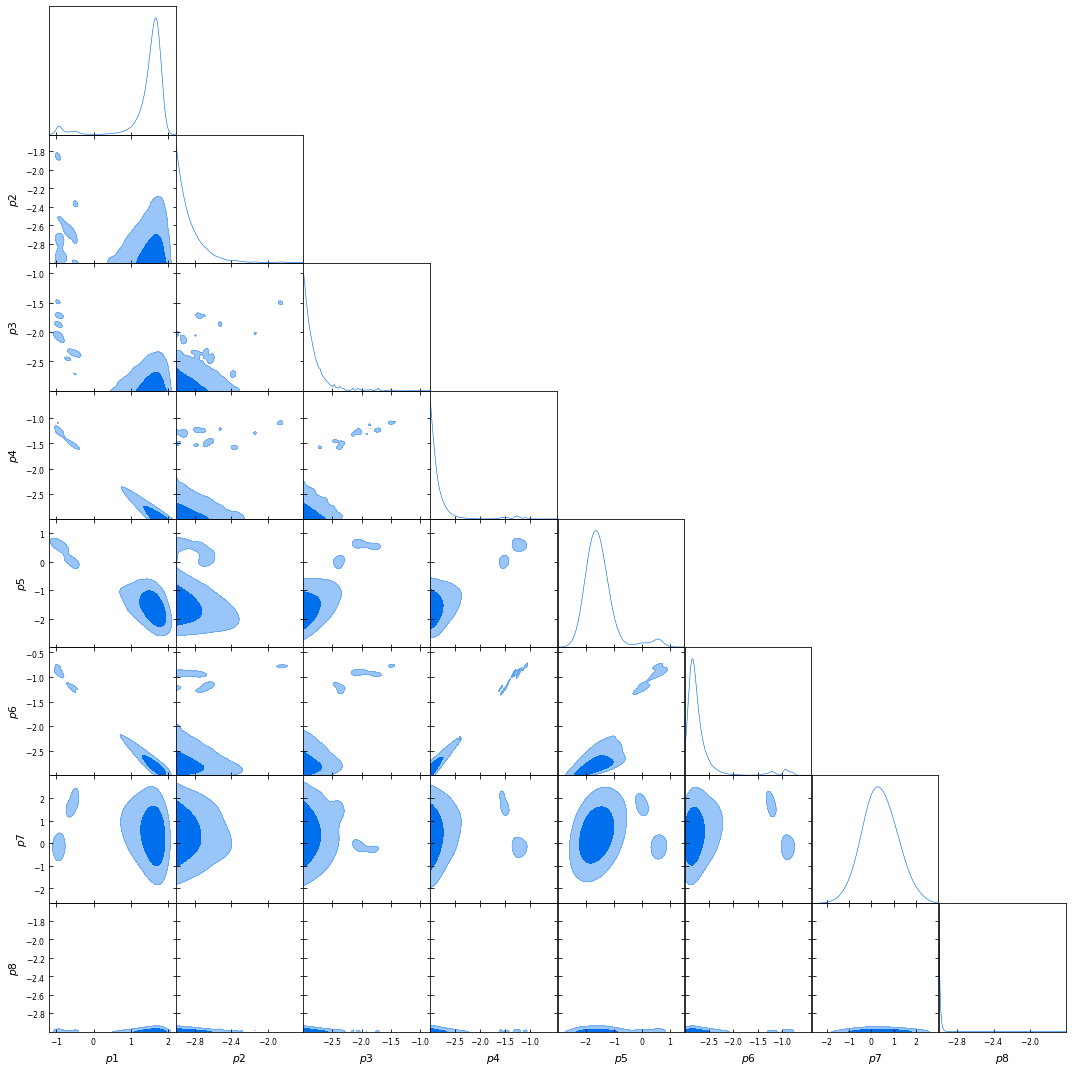

In [13]:
gdsamples_DALI3Norm = MCSamplesFromCobaya(updated_DALI3Norm, sampler_DALI3Norm.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=15)
gdplot.triangle_plot(gdsamples_DALI3Norm, ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"], filled=True)

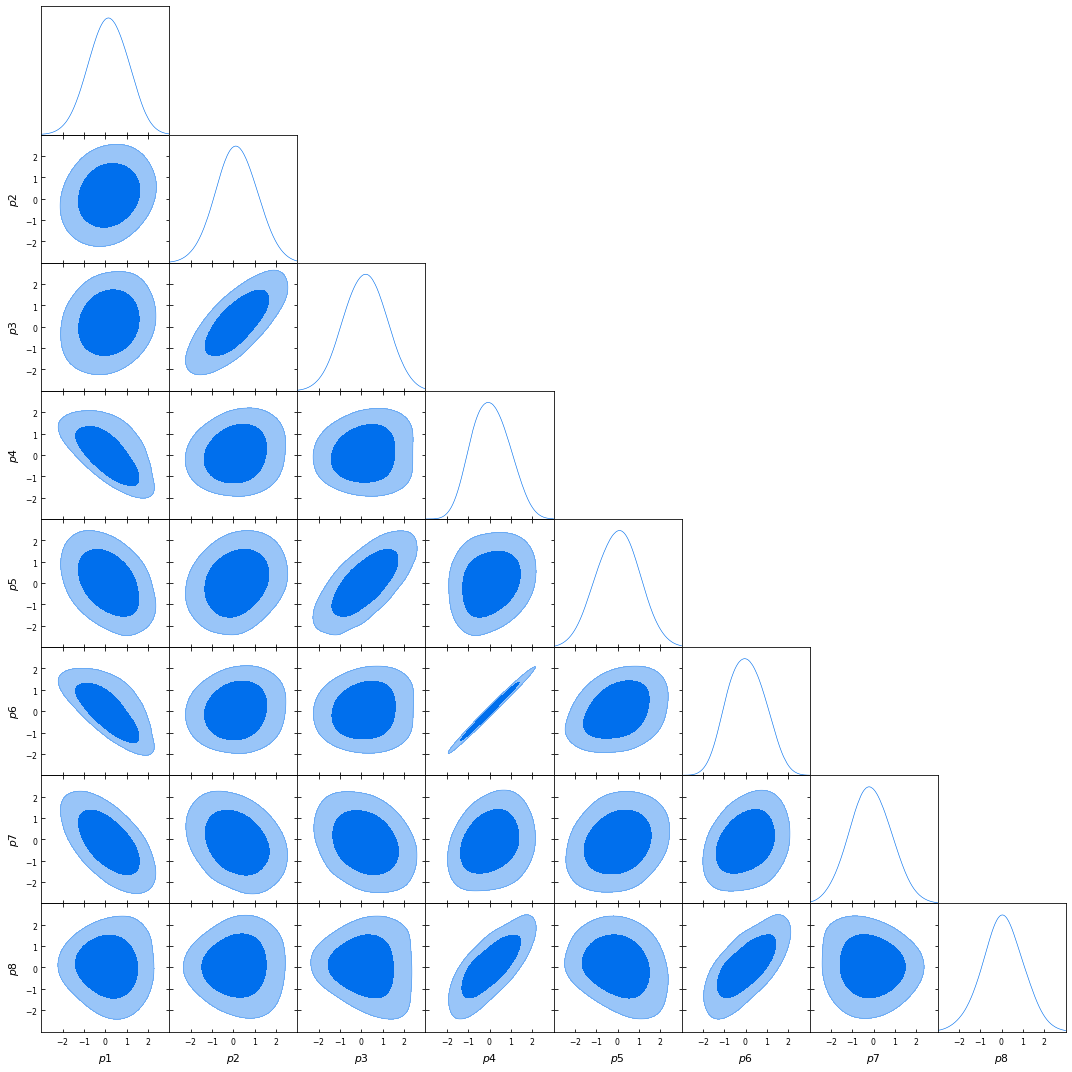

In [14]:
gdsamples_DALI4Norm = MCSamplesFromCobaya(updated_DALI4Norm, sampler_DALI4Norm.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=15)
gdplot.triangle_plot(gdsamples_DALI4Norm, ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"], filled=True)

[root] *WARNING* auto bandwidth for p8 very small or failed (h=0.0002792382545176852,N_eff=14058.483967281309). Using fallback (h=0.0004457504480718672)
[root] *WARNING* fine_bins not large enough to well sample smoothing scale - p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p2, p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p3, p4
[root] *WARNING* fine_bins_2D not large enough for optimal density: p3, p8
[root] *WARNING* fine_bins_2D not large enough for optimal density: p4, p8


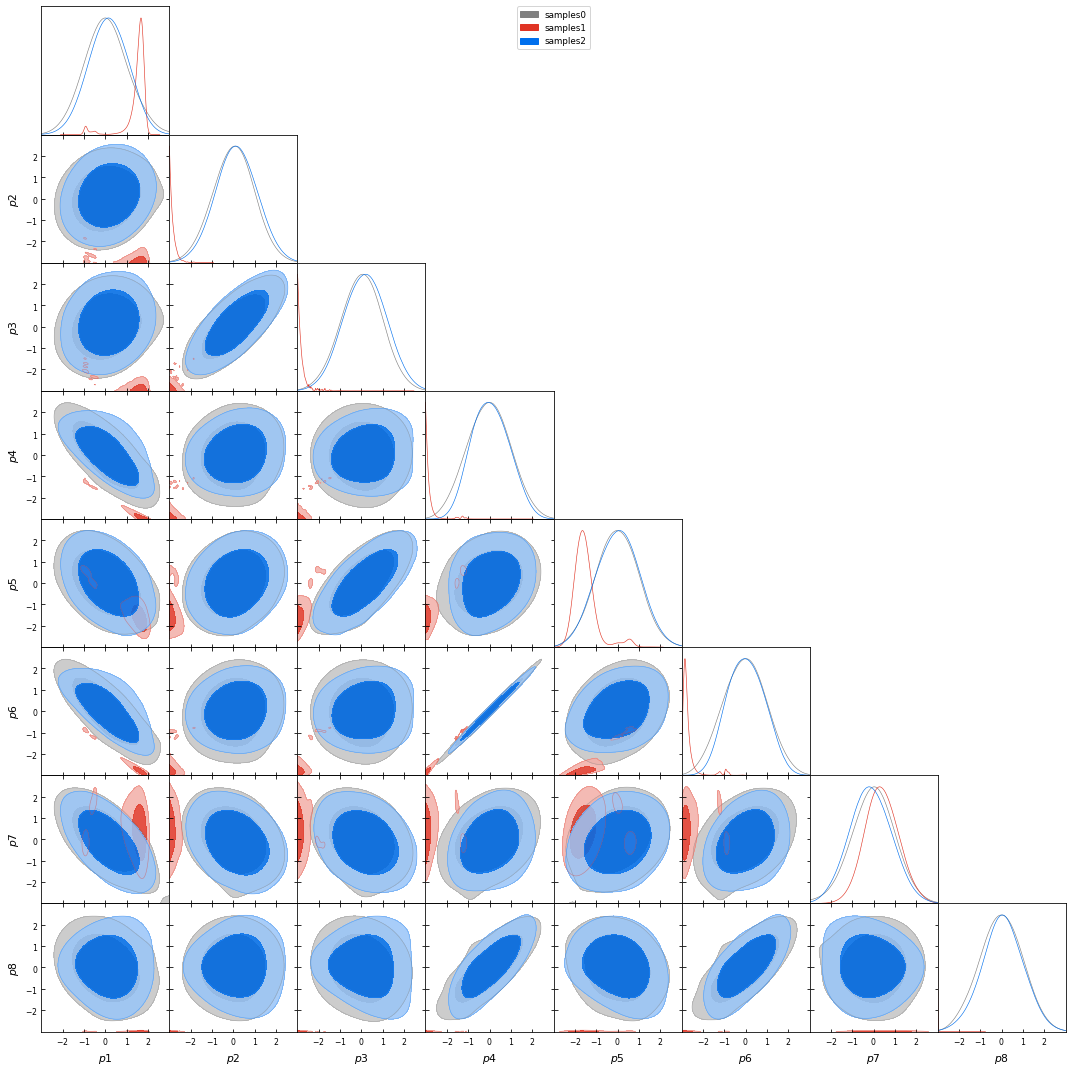

In [15]:
gdplot = gdplt.get_subplot_plotter(width_inch=15)
gdplot.triangle_plot([gdsamples_Fisher, gdsamples_DALI3Norm, gdsamples_DALI4Norm], ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"], filled=True)

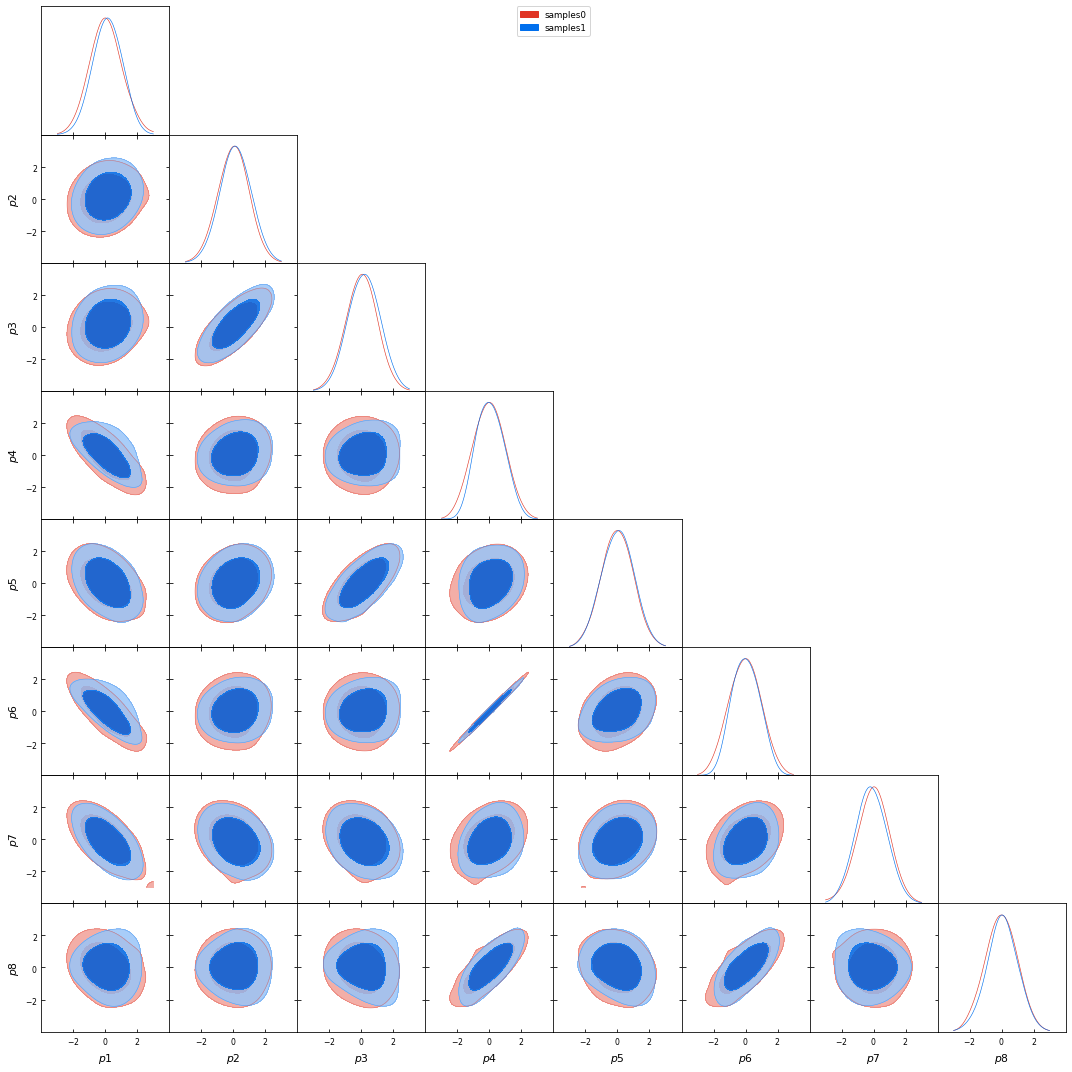

In [32]:
#param_limits
myLimitsNorm = {'p1':(-4,4),
               'p2':(-4,4),
               'p3':(-4,4),
               'p4':(-4,4),
               'p5':(-4,4),
               'p6':(-4,4),
               'p7':(-4,4),
               'p8':(-4,4),}

gdplot = gdplt.get_subplot_plotter(width_inch=15)
gdplot.triangle_plot([gdsamples_Fisher, gdsamples_DALI4Norm], \
                     ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8"], filled=True, param_limits=myLimitsNorm)

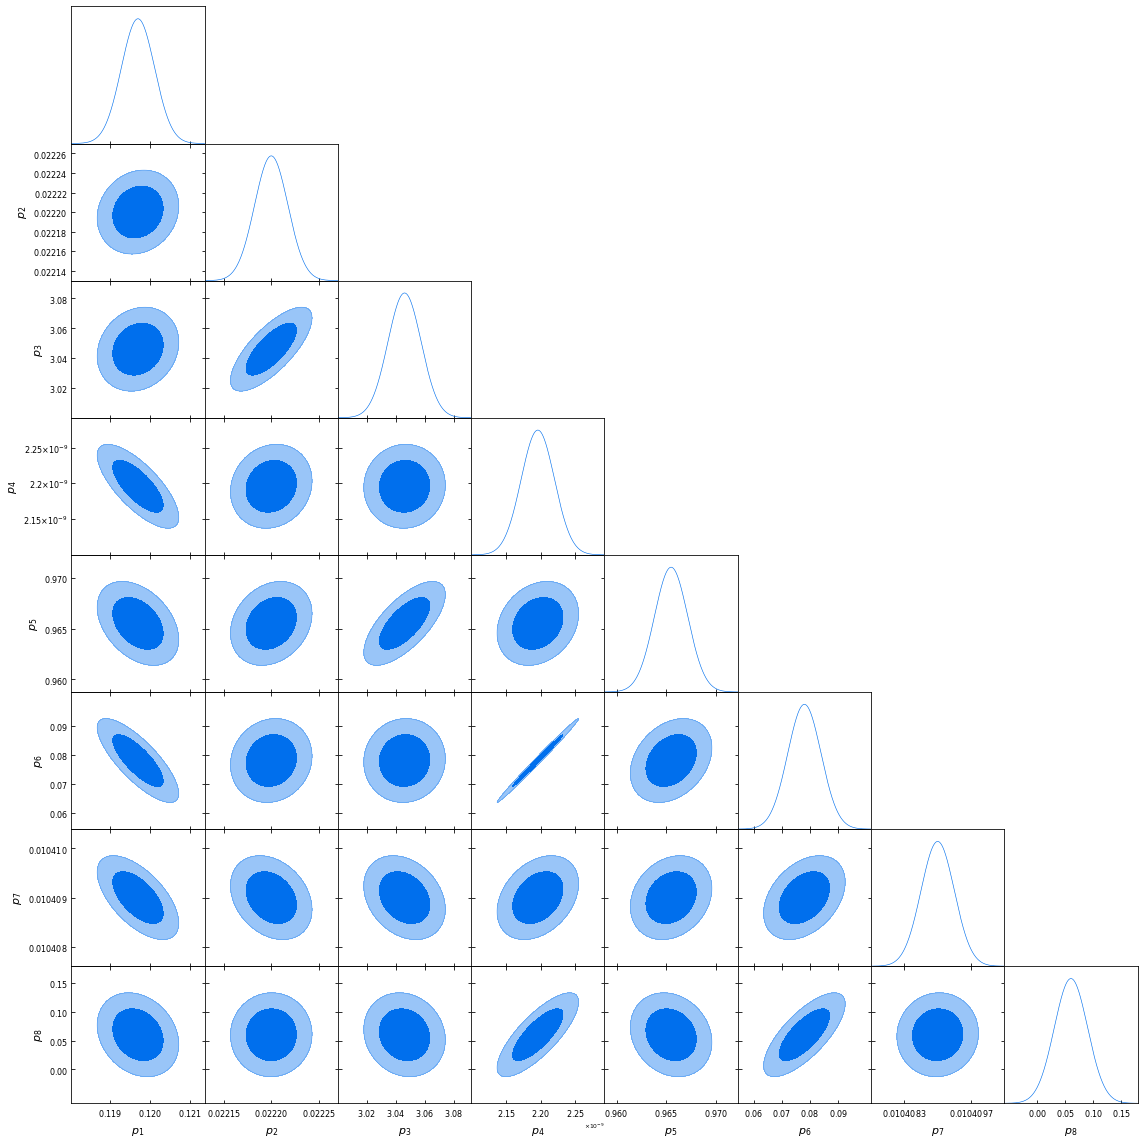

In [17]:
# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND

myCovs = np.linalg.inv(myFisher)

nParams = len(data['cosmoFid'])
myMeans = np.zeros(nParams)
for p, param in enumerate(data['cosmoFid']):
    myMeans[p] = data['cosmoFid'][param]

gauss=GaussianND(myMeans, myCovs)
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gauss,filled=True)

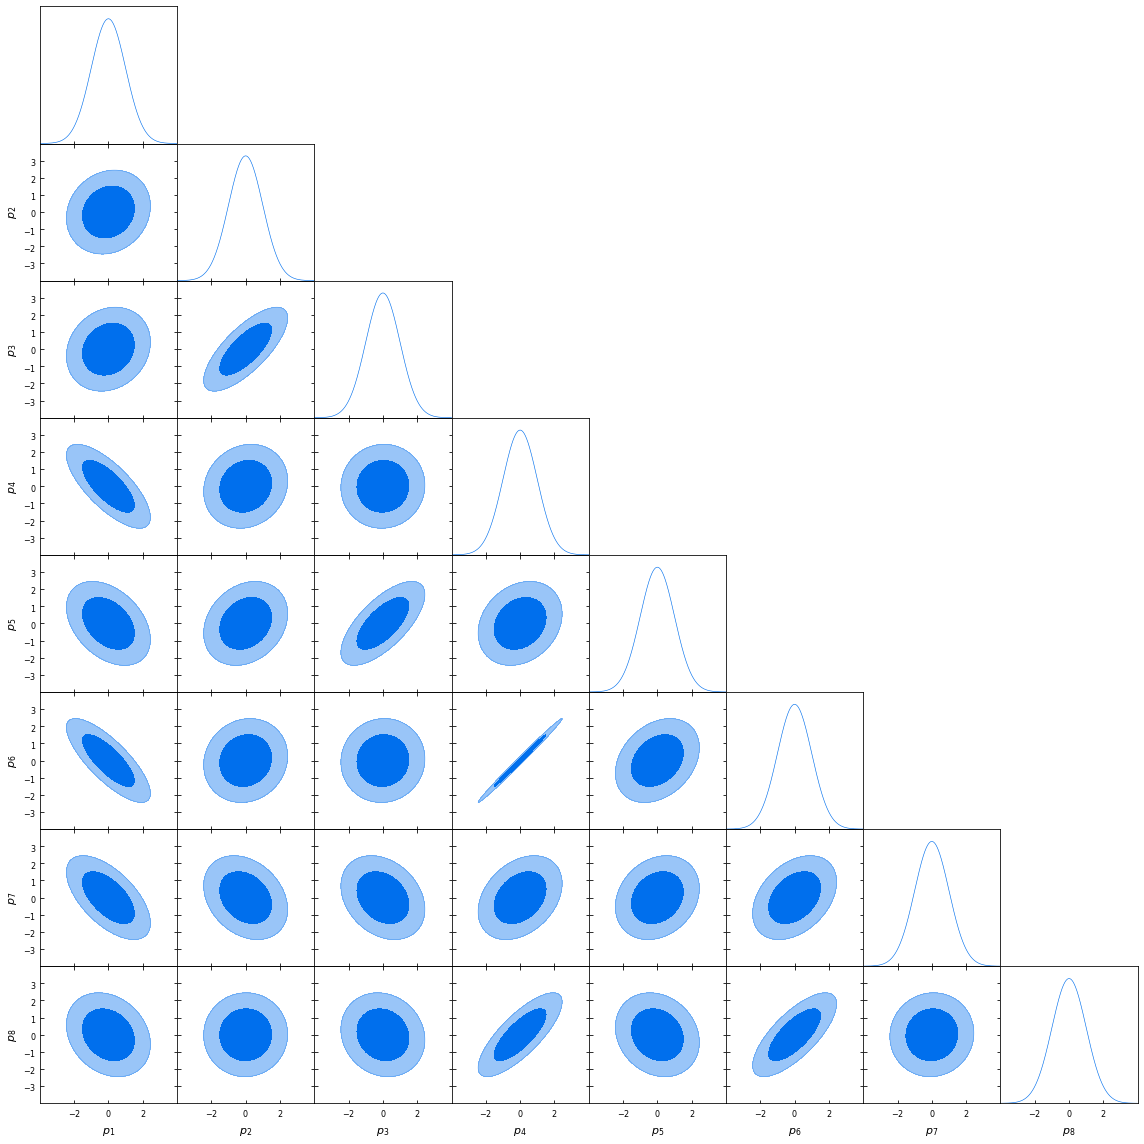

In [31]:
myCovsNorm = np.zeros((nParams,nParams))

for i in range(nParams):
    for j in range(nParams):
        covi = np.sqrt(myCovs[i][i])
        covj = np.sqrt(myCovs[j][j])
        myCovsNorm[i][j] = myCovs[i][j]/(covi*covj)

myMeansNorm = np.zeros(nParams)

gaussNorm=GaussianND(myMeansNorm, myCovsNorm, label='Model')
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gaussNorm,filled=True)